<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula07a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
dataset=load_wine()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

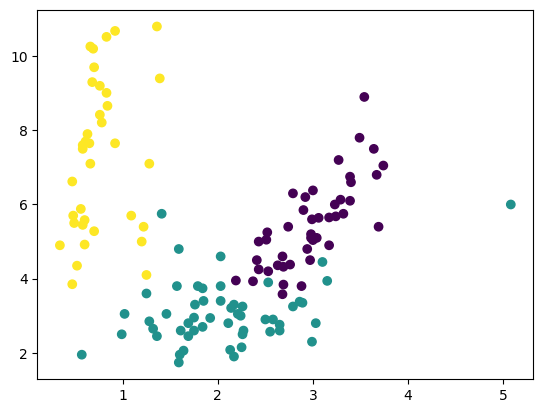

In [3]:
import matplotlib.pyplot as plt

def plot_dataset(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y)

feats = [6, 9]
plot_dataset(X_train[:,feats], y_train)

In [4]:
print(set(y))

{np.int64(0), np.int64(1), np.int64(2)}


In [17]:
import numpy as np

labels_ = np.unique(y)
y_hot = np.zeros((len(y), len(labels_)), dtype=int)
for i, label in enumerate(labels_):
  y_hot[y == label, i] = 1

print(y)
print(y_hot)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]

In [30]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def add_bias(X):
  bias = np.ones((X.shape[0], 1))
  return np.concatenate((bias, X), axis=1)

class LinearClassifier(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X = add_bias(X)
    self.labels_ = np.unique(y)
    y_hot = np.zeros((len(y), len(self.labels_)), dtype=int)
    for i, label in enumerate(self.labels_):
      y_hot[y == label, i] = 1
    self.w = np.linalg.pinv(X) @ y_hot
    # self.w = np.linalg.pinv(X) @ y
    return self

  def predict(self, X):
    X = add_bias(X)
    y_pred = X @ self.w
    idx_pred = np.argmax(y_pred, axis=1)
    return self.labels_[idx_pred]
    # return np.round(X @ self.w)

model = LinearClassifier()
model.fit(X_train[:,feats], y_train)
y_pred = model.predict(X_test[:,feats])
print(accuracy_score(y_test, y_pred))

0.8444444444444444


In [31]:
model.w

array([[-0.67373558,  1.32035017,  0.35338541],
       [ 0.34434123, -0.05050084, -0.2938404 ],
       [ 0.06149942, -0.16338139,  0.10188197]])

In [32]:
def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

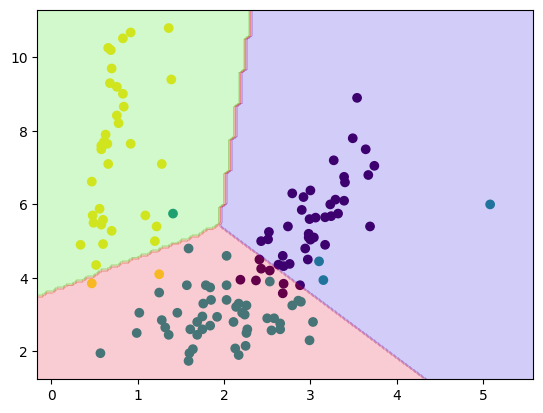

In [33]:
plot_dataset(X_train[:,feats], y_train)
plot_predictions(model, X_train[:,feats])

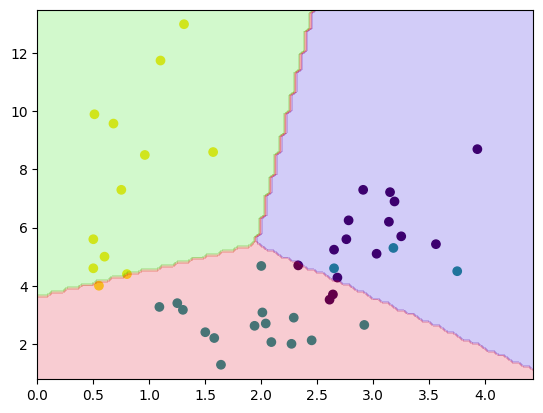

In [34]:
plot_dataset(X_test[:,feats], y_test)
plot_predictions(model, X_test[:,feats])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.79      0.83      0.81        18
           2       1.00      0.92      0.96        12

    accuracy                           0.84        45
   macro avg       0.86      0.85      0.86        45
weighted avg       0.85      0.84      0.85        45



In [37]:
model = LinearClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [40]:
from sklearn.model_selection import cross_validate
from pprint import pprint

scores = cross_validate(model, X, y, cv=5, return_train_score=True)
pprint(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00252199, 0.00047851, 0.00041366, 0.00043178, 0.00038028]),
 'score_time': array([0.00149322, 0.00049138, 0.00053453, 0.0004456 , 0.00053573]),
 'test_score': array([0.97222222, 0.88888889, 0.97222222, 0.91428571, 1.        ]),
 'train_score': array([1.        , 1.        , 0.99295775, 1.        , 1.        ])}
0.9495238095238095
